# Jaro-Winkler Distance

The Jaro-Winkler distance is a string metric for measuring the edit distance between two sequences. It is a variant of the Jaro distance, modified to give higher weights to strings that match from the beginning. This makes it particularly well-suited for comparing short strings such as person names, where errors are more likely to occur toward the end of the string rather than the beginning.


## Definition and Concept

The Jaro-Winkler distance builds upon the Jaro distance, which was originally developed for record linkage in the U.S. Census. The Jaro distance is based on the number and order of common characters between two strings.

### Jaro Distance

The Jaro distance d<sub>j</sub> between strings s1 and s2 is defined as:

$$d_j = \begin{cases}
0 & \text{if } m = 0 \\
\frac{1}{3} \left( \frac{m}{|s1|} + \frac{m}{|s2|} + \frac{m - t}{m} \right) & \text{otherwise}
\end{cases}$$

Where:
- |s1| and |s2| are the lengths of the strings
- m is the number of matching characters
- t is the number of transpositions

Two characters from s1 and s2 are considered matching if they are the same and not farther than ⌊max(|s1|, |s2|)/2⌋ - 1 positions apart.

The number of transpositions is calculated as the number of matching characters that are in a different sequence order, divided by 2.

### Jaro-Winkler Distance

The Jaro-Winkler distance d<sub>w</sub> is defined as:

$$d_w = d_j + (l \times p \times (1 - d_j))$$

Where:
- d<sub>j</sub> is the Jaro distance
- l is the length of the common prefix (up to 4 characters)
- p is a scaling factor (default is 0.1)

The Jaro-Winkler distance gives more favorable ratings to strings that match from the beginning. The scaling factor p controls how much the score is adjusted for having common prefixes.

Both Jaro and Jaro-Winkler distances range from 0 to 1, where 1 means an exact match and 0 means no similarity.


In [1]:
# Implementation of Jaro Distance
def jaro_distance(s1, s2):
    """
    Calculate the Jaro distance between two strings.

    Parameters:
    -----------
    s1, s2 : str
        The two strings to compare

    Returns:
    --------
    float
        The Jaro distance (between 0 and 1)
    """
    # If both strings are empty, return 1.0 (identical)
    if not s1 and not s2:
        return 1.0

    # If one string is empty, return 0.0 (no similarity)
    if not s1 or not s2:
        return 0.0

    # Calculate match distance (how far to look for matching characters)
    match_distance = max(len(s1), len(s2)) // 2 - 1
    match_distance = max(0, match_distance)  # Ensure it's not negative

    # Initialize arrays to track which characters have matched
    s1_matches = [False] * len(s1)
    s2_matches = [False] * len(s2)

    # Count matching characters
    matches = 0
    for i in range(len(s1)):
        # Calculate the range to look for matches
        start = max(0, i - match_distance)
        end = min(i + match_distance + 1, len(s2))

        for j in range(start, end):
            # If s2[j] hasn't been matched yet and it matches s1[i]
            if not s2_matches[j] and s1[i] == s2[j]:
                s1_matches[i] = True
                s2_matches[j] = True
                matches += 1
                break

    # If no characters match, return 0.0
    if matches == 0:
        return 0.0

    # Count transpositions (matching characters that are in different order)
    transpositions = 0
    j = 0
    for i in range(len(s1)):
        if s1_matches[i]:
            # Find the next matched character in s2
            while not s2_matches[j]:
                j += 1

            # If the characters don't match, it's a transposition
            if s1[i] != s2[j]:
                transpositions += 1

            j += 1

    # Divide by 2 as per the definition
    transpositions = transpositions // 2

    # Calculate Jaro distance
    return (matches / len(s1) + matches / len(s2) + (matches - transpositions) / matches) / 3.0

# Implementation of Jaro-Winkler Distance
def jaro_winkler_distance(s1, s2, p=0.1):
    """
    Calculate the Jaro-Winkler distance between two strings.

    Parameters:
    -----------
    s1, s2 : str
        The two strings to compare
    p : float
        The scaling factor for how much the score is adjusted for having common prefixes.
        Default is 0.1, should not exceed 0.25.

    Returns:
    --------
    float
        The Jaro-Winkler distance (between 0 and 1)
    """
    # Calculate the Jaro distance
    jaro_dist = jaro_distance(s1, s2)

    # If the Jaro distance is low, just return it
    if jaro_dist < 0.7:
        return jaro_dist

    # Calculate the length of the common prefix (up to 4 characters)
    prefix_len = 0
    for i in range(min(len(s1), len(s2), 4)):
        if s1[i] == s2[i]:
            prefix_len += 1
        else:
            break

    # Calculate Jaro-Winkler distance
    return jaro_dist + (prefix_len * p * (1 - jaro_dist))

# Example usage
examples = [
    ("martha", "marhta"),
    ("dixon", "dicksonx"),
    ("jellyfish", "smellyfish"),
    ("arnab", "aranb"),
    ("john", "jon"),
    ("identical", "identical")
]

print("Jaro and Jaro-Winkler Distance Examples:")
for s1, s2 in examples:
    jaro = jaro_distance(s1, s2)
    jaro_winkler = jaro_winkler_distance(s1, s2)
    print(f"'{s1}' vs '{s2}':")
    print(f"  Jaro Distance: {jaro:.4f}")
    print(f"  Jaro-Winkler Distance: {jaro_winkler:.4f}")
    print(f"  Difference: {jaro_winkler - jaro:.4f}")
    print()


Jaro and Jaro-Winkler Distance Examples:
'martha' vs 'marhta':
  Jaro Distance: 0.9444
  Jaro-Winkler Distance: 0.9611
  Difference: 0.0167

'dixon' vs 'dicksonx':
  Jaro Distance: 0.7667
  Jaro-Winkler Distance: 0.8133
  Difference: 0.0467

'jellyfish' vs 'smellyfish':
  Jaro Distance: 0.8963
  Jaro-Winkler Distance: 0.8963
  Difference: 0.0000

'arnab' vs 'aranb':
  Jaro Distance: 0.9333
  Jaro-Winkler Distance: 0.9467
  Difference: 0.0133

'john' vs 'jon':
  Jaro Distance: 0.9167
  Jaro-Winkler Distance: 0.9333
  Difference: 0.0167

'identical' vs 'identical':
  Jaro Distance: 1.0000
  Jaro-Winkler Distance: 1.0000
  Difference: 0.0000



## Visualizing Jaro-Winkler Distance

To better understand how the Jaro-Winkler distance works, let's visualize the matching characters and transpositions for a pair of strings:


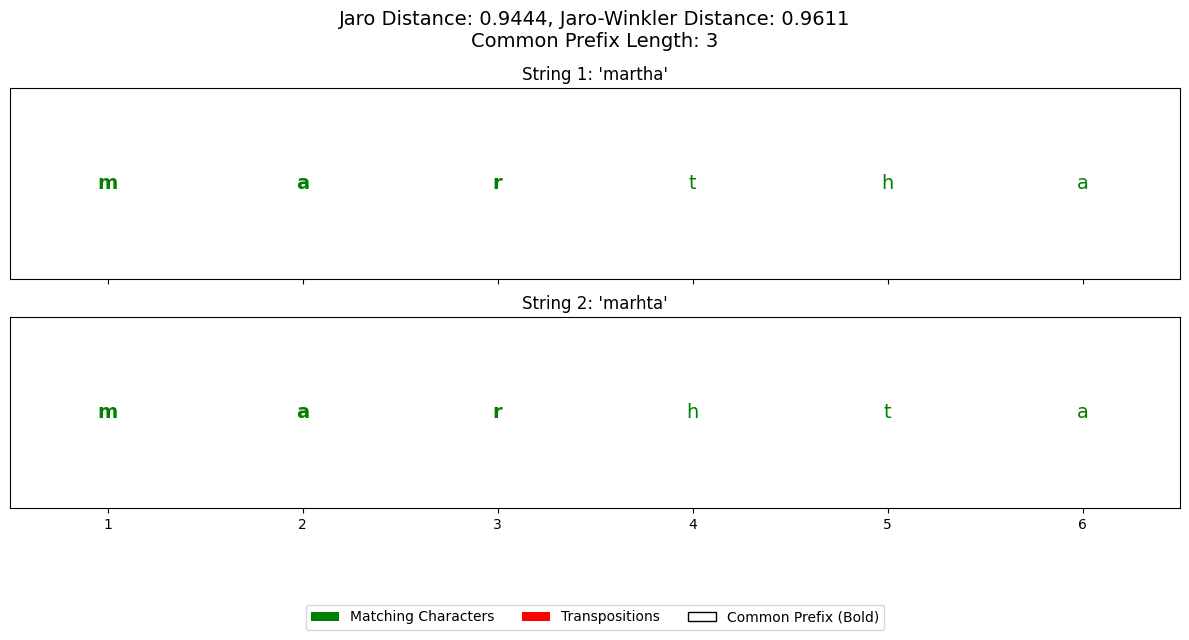

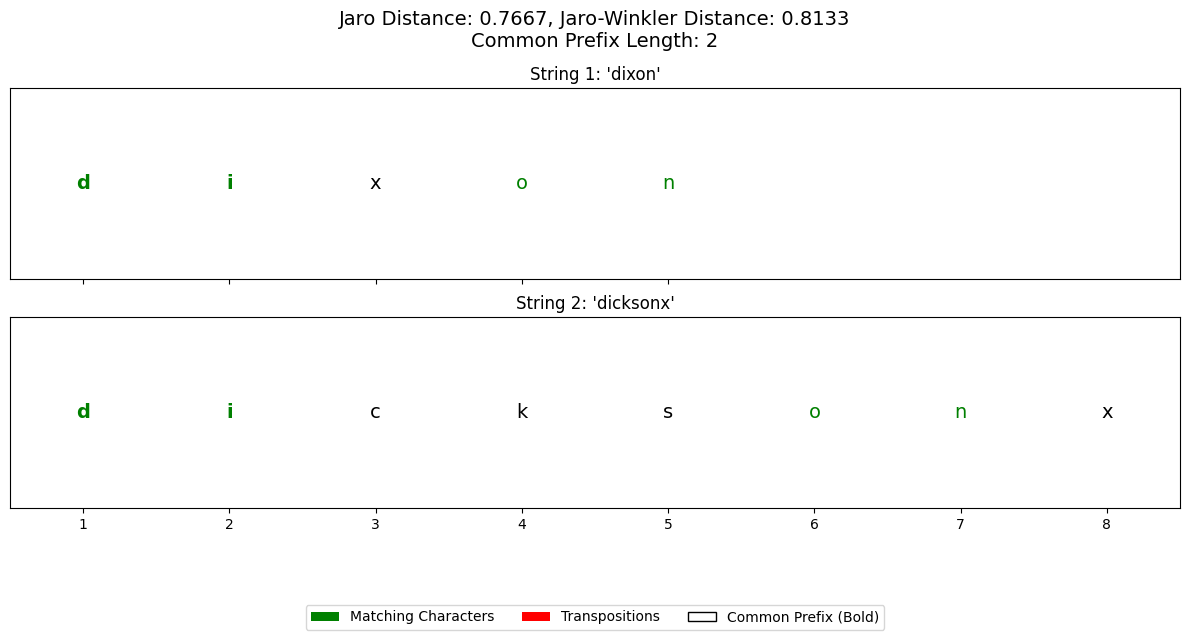

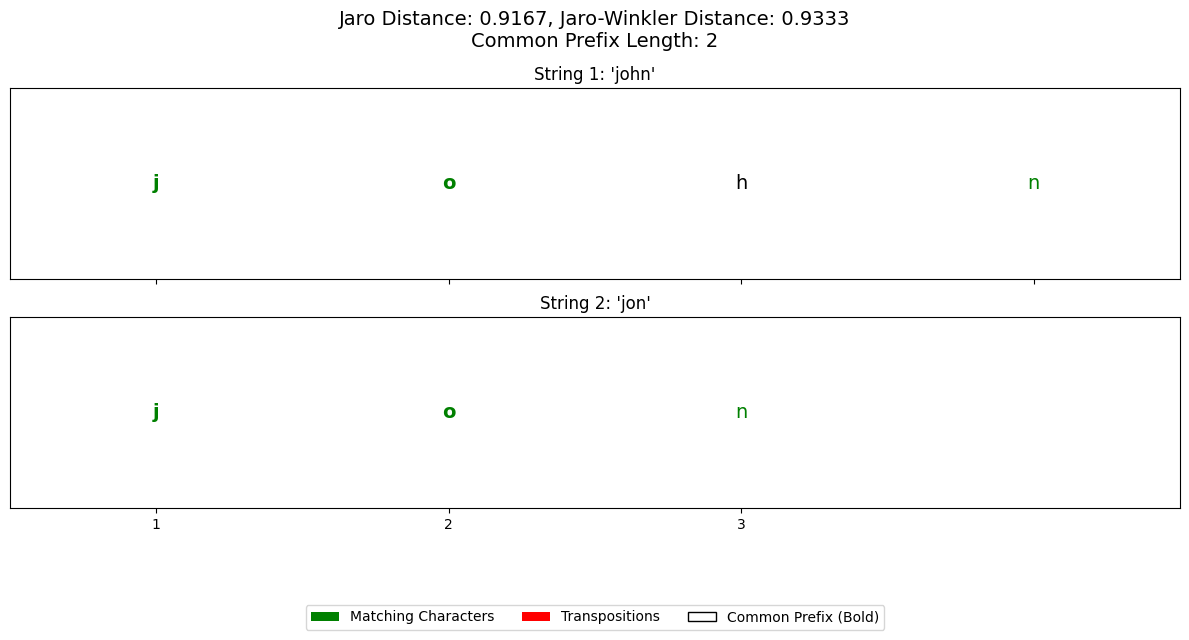

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_jaro_winkler(s1, s2):
    """
    Visualize the Jaro-Winkler distance calculation between two strings.

    Parameters:
    -----------
    s1, s2 : str
        The two strings to compare
    """
    # Calculate match distance
    match_distance = max(len(s1), len(s2)) // 2 - 1
    match_distance = max(0, match_distance)

    # Find matching characters
    s1_matches = [False] * len(s1)
    s2_matches = [False] * len(s2)

    for i in range(len(s1)):
        start = max(0, i - match_distance)
        end = min(i + match_distance + 1, len(s2))

        for j in range(start, end):
            if not s2_matches[j] and s1[i] == s2[j]:
                s1_matches[i] = True
                s2_matches[j] = True
                break

    # Calculate common prefix length
    prefix_len = 0
    for i in range(min(len(s1), len(s2), 4)):
        if s1[i] == s2[i]:
            prefix_len += 1
        else:
            break

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

    # Plot the strings with matching characters highlighted
    for i, char in enumerate(s1):
        color = 'green' if s1_matches[i] else 'black'
        weight = 'bold' if i < prefix_len else 'normal'
        ax1.text(i, 0, char, ha='center', va='center', color=color, fontweight=weight, fontsize=14)

    for i, char in enumerate(s2):
        color = 'green' if s2_matches[i] else 'black'
        weight = 'bold' if i < prefix_len else 'normal'
        ax2.text(i, 0, char, ha='center', va='center', color=color, fontweight=weight, fontsize=14)

    # Draw lines connecting matching characters
    matched_pairs = []
    j = 0
    for i in range(len(s1)):
        if s1_matches[i]:
            # Find the corresponding match in s2
            while j < len(s2) and not s2_matches[j]:
                j += 1
            if j < len(s2):
                matched_pairs.append((i, j))
                j += 1

    for i, j in matched_pairs:
        # Draw a line connecting the matching characters
        # Use red for transpositions, green for matches in order
        is_transposition = False
        for prev_i, prev_j in matched_pairs:
            if prev_i < i and prev_j > j:
                is_transposition = True
                break

        color = 'red' if is_transposition else 'green'
        ax1.plot([i, j], [0, 1], color=color, alpha=0.5, transform=ax1.transData + ax2.transData.inverted())

    # Set axis limits and remove ticks
    ax1.set_xlim(-0.5, max(len(s1), len(s2)) - 0.5)
    ax1.set_ylim(-0.5, 0.5)
    ax1.set_yticks([])
    ax1.set_xticks(range(len(s1)))
    ax1.set_xticklabels([])

    ax2.set_xlim(-0.5, max(len(s1), len(s2)) - 0.5)
    ax2.set_ylim(-0.5, 0.5)
    ax2.set_yticks([])
    ax2.set_xticks(range(len(s2)))
    ax2.set_xticklabels(range(1, len(s2) + 1))

    # Add titles and labels
    ax1.set_title(f"String 1: '{s1}'")
    ax2.set_title(f"String 2: '{s2}'")

    # Calculate and display the distances
    jaro = jaro_distance(s1, s2)
    jaro_winkler = jaro_winkler_distance(s1, s2)

    fig.suptitle(f"Jaro Distance: {jaro:.4f}, Jaro-Winkler Distance: {jaro_winkler:.4f}\nCommon Prefix Length: {prefix_len}", fontsize=14)

    # Add a legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='green', label='Matching Characters'),
        Patch(facecolor='red', label='Transpositions'),
        Patch(facecolor='white', edgecolor='black', label='Common Prefix (Bold)')
    ]
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85, bottom=0.15)
    plt.show()

# Example visualization
visualize_jaro_winkler("martha", "marhta")
visualize_jaro_winkler("dixon", "dicksonx")
visualize_jaro_winkler("john", "jon")


## Applications of Jaro-Winkler Distance

The Jaro-Winkler distance has numerous applications across various domains:

### 1. Record Linkage and Deduplication

One of the primary applications of Jaro-Winkler distance is in record linkage and deduplication, particularly for person names:


In [3]:
def find_matching_records(query, records, threshold=0.85):
    """
    Find records that match a query using Jaro-Winkler distance.

    Parameters:
    -----------
    query : str
        The query string
    records : list
        List of records to search through
    threshold : float
        Minimum similarity threshold (0-1)

    Returns:
    --------
    list
        Matching records sorted by similarity
    """
    results = []

    for record in records:
        similarity = jaro_winkler_distance(query.lower(), record.lower())
        if similarity >= threshold:
            results.append((record, similarity))

    # Sort by similarity (descending)
    results.sort(key=lambda x: x[1], reverse=True)

    return results

# Example usage for name matching
names = [
    "John Smith", "Jon Smith", "John Smyth", "Jon Smythe",
    "Robert Johnson", "Rupert Johnson", "Rob Johnson",
    "William Brown", "Bill Brown", "Will Brown",
    "Michael Davis", "Mike Davis", "Micheal Davies"
]

queries = ["Jon Smyth", "Robert Jonson", "Bill Brwn"]

print("Record Linkage Examples:")
for query in queries:
    print(f"\nQuery: '{query}'")
    matches = find_matching_records(query, names)
    for name, similarity in matches:
        print(f"  '{name}' (similarity: {similarity:.4f})")


Record Linkage Examples:

Query: 'Jon Smyth'
  'Jon Smythe' (similarity: 0.9800)
  'John Smyth' (similarity: 0.9733)
  'Jon Smith' (similarity: 0.9556)
  'John Smith' (similarity: 0.9170)

Query: 'Robert Jonson'
  'Robert Johnson' (similarity: 0.9857)
  'Rob Johnson' (similarity: 0.9249)
  'Rupert Johnson' (similarity: 0.8896)

Query: 'Bill Brwn'
  'Bill Brown' (similarity: 0.9800)
  'Will Brown' (similarity: 0.8963)


### 2. Spell Checking and Correction

Jaro-Winkler distance is effective for spell checking, especially for short words where the beginning is typically correct:


In [4]:
def spell_check(word, dictionary, threshold=0.85):
    """
    Find the closest word in the dictionary using Jaro-Winkler distance.

    Parameters:
    -----------
    word : str
        The potentially misspelled word
    dictionary : list
        A list of correctly spelled words
    threshold : float
        Minimum similarity threshold (0-1)

    Returns:
    --------
    list
        Potential corrections sorted by similarity
    """
    if word in dictionary:
        return [(word, 1.0)]  # Word is already correct

    results = []

    for dict_word in dictionary:
        similarity = jaro_winkler_distance(word.lower(), dict_word.lower())
        if similarity >= threshold:
            results.append((dict_word, similarity))

    # Sort by similarity (descending)
    results.sort(key=lambda x: x[1], reverse=True)

    return results

# Example usage
dictionary = [
    "apple", "banana", "orange", "grape", "pineapple", 
    "strawberry", "blueberry", "watermelon", "peach", "pear",
    "apricot", "cherry", "plum", "mango", "kiwi"
]

misspelled_words = ["aple", "banan", "ornage", "bluberry", "pinaple"]

print("Spell Checking Examples:")
for word in misspelled_words:
    print(f"\nMisspelled: '{word}'")
    corrections = spell_check(word, dictionary)
    if corrections:
        for correction, similarity in corrections:
            print(f"  '{correction}' (similarity: {similarity:.4f})")
    else:
        print("  No suggestions found")


Spell Checking Examples:

Misspelled: 'aple'
  'apple' (similarity: 0.9467)

Misspelled: 'banan'
  'banana' (similarity: 0.9667)

Misspelled: 'ornage'
  'orange' (similarity: 0.9556)

Misspelled: 'bluberry'
  'blueberry' (similarity: 0.9449)

Misspelled: 'pinaple'
  'pineapple' (similarity: 0.8815)


### 3. Fuzzy Search in Databases

Jaro-Winkler distance is useful for implementing fuzzy search functionality in databases:


In [5]:
def fuzzy_search_database(query, database, field, threshold=0.8):
    """
    Perform a fuzzy search on a database using Jaro-Winkler distance.

    Parameters:
    -----------
    query : str
        The search query
    database : list of dict
        List of database records (dictionaries)
    field : str
        The field to search in
    threshold : float
        Minimum similarity threshold (0-1)

    Returns:
    --------
    list
        Matching records sorted by similarity
    """
    results = []

    for record in database:
        if field in record:
            similarity = jaro_winkler_distance(query.lower(), record[field].lower())
            if similarity >= threshold:
                results.append((record, similarity))

    # Sort by similarity (descending)
    results.sort(key=lambda x: x[1], reverse=True)

    return results

# Example database of customers
customer_db = [
    {"id": 1, "name": "John Smith", "email": "john.smith@example.com", "city": "New York"},
    {"id": 2, "name": "Jane Doe", "email": "jane.doe@example.com", "city": "Los Angeles"},
    {"id": 3, "name": "Robert Johnson", "email": "robert.j@example.com", "city": "Chicago"},
    {"id": 4, "name": "Emily Wilson", "email": "emily.w@example.com", "city": "Houston"},
    {"id": 5, "name": "Michael Brown", "email": "michael.b@example.com", "city": "Phoenix"},
    {"id": 6, "name": "Sarah Miller", "email": "sarah.m@example.com", "city": "Philadelphia"},
    {"id": 7, "name": "David Garcia", "email": "david.g@example.com", "city": "San Antonio"},
    {"id": 8, "name": "Jennifer Martinez", "email": "jennifer.m@example.com", "city": "San Diego"},
    {"id": 9, "name": "James Johnson", "email": "james.j@example.com", "city": "Dallas"},
    {"id": 10, "name": "Lisa Wilson", "email": "lisa.w@example.com", "city": "San Francisco"}
]

# Example queries
queries = ["Jon Smith", "San Fransisco", "Robrt Johnson"]

print("Database Fuzzy Search Examples:")
for query in queries:
    print(f"\nQuery: '{query}'")

    # Search in names
    print("  Results from name field:")
    name_matches = fuzzy_search_database(query, customer_db, "name")
    for record, similarity in name_matches:
        print(f"    ID: {record['id']}, Name: '{record['name']}' (similarity: {similarity:.4f})")

    # Search in cities
    print("  Results from city field:")
    city_matches = fuzzy_search_database(query, customer_db, "city")
    for record, similarity in city_matches:
        print(f"    ID: {record['id']}, City: '{record['city']}' (similarity: {similarity:.4f})")


Database Fuzzy Search Examples:

Query: 'Jon Smith'
  Results from name field:
    ID: 1, Name: 'John Smith' (similarity: 0.9733)
  Results from city field:

Query: 'San Fransisco'
  Results from name field:
  Results from city field:
    ID: 10, City: 'San Francisco' (similarity: 0.9526)
    ID: 7, City: 'San Antonio' (similarity: 0.8435)
    ID: 8, City: 'San Diego' (similarity: 0.8256)

Query: 'Robrt Johnson'
  Results from name field:
    ID: 3, Name: 'Robert Johnson' (similarity: 0.9833)
  Results from city field:


## Advantages and Limitations

### Advantages:

1. **Prefix Weighting**: Gives higher weight to strings that match from the beginning, which is particularly useful for names and short strings where errors typically occur toward the end
2. **Designed for Short Strings**: Optimized for comparing short strings like names, making it ideal for record linkage and name matching
3. **Intuitive Metric**: The concept is easy to understand and interpret
4. **Handles Transpositions**: Accounts for character transpositions, which are common typing errors
5. **Efficient Computation**: O(n) time complexity, where n is the length of the strings

### Limitations:

1. **Limited to Short Strings**: Not as effective for long strings or full documents
2. **Fixed Match Distance**: The match distance calculation (max/2 - 1) may not be optimal for all applications
3. **No Semantic Awareness**: Doesn't consider the meaning or context of the text
4. **Prefix Bias**: The emphasis on prefix matching may not be appropriate for all applications
5. **Character-level Only**: Doesn't account for word-level or phonetic similarities


## Comparison with Other String Metrics

Jaro-Winkler distance is one of many string similarity metrics. Here's how it compares to some others:

### 1. Levenshtein Distance
- Based on edit operations (insertions, deletions, substitutions)
- Works well for strings of different lengths
- Doesn't give special weight to prefixes
- More computationally expensive (O(m×n) time complexity)

### 2. Hamming Distance
- Only counts substitutions (no insertions/deletions)
- Only works for strings of equal length
- Doesn't account for transpositions
- Faster to compute than Jaro-Winkler

### 3. Jaccard Similarity
- Based on character or word sets, not sequences
- Ignores order and position
- Better for document similarity when word order is less important
- Doesn't give special weight to any part of the string

### 4. Soundex and Metaphone
- Phonetic algorithms that match similar-sounding words
- Better for matching names that sound alike but are spelled differently
- Less sensitive to spelling variations
- Not as precise for general string similarity


In [6]:
# Comparing Jaro-Winkler with other string metrics
def compare_string_metrics(str1, str2):
    """
    Compare different string similarity metrics.

    Parameters:
    -----------
    str1, str2 : str
        The strings to compare

    Returns:
    --------
    dict
        Dictionary with different similarity metrics
    """
    # Jaro and Jaro-Winkler similarity
    jaro = jaro_distance(str1, str2)
    jaro_winkler = jaro_winkler_distance(str1, str2)

    # Levenshtein similarity (normalized)
    def levenshtein_distance(s1, s2):
        if len(s1) == 0: return len(s2)
        if len(s2) == 0: return len(s1)

        # Create matrix
        matrix = [[0 for x in range(len(s2) + 1)] for x in range(len(s1) + 1)]

        # Initialize first row and column
        for i in range(len(s1) + 1): matrix[i][0] = i
        for j in range(len(s2) + 1): matrix[0][j] = j

        # Fill the matrix
        for i in range(1, len(s1) + 1):
            for j in range(1, len(s2) + 1):
                cost = 0 if s1[i-1] == s2[j-1] else 1
                matrix[i][j] = min(
                    matrix[i-1][j] + 1,      # Deletion
                    matrix[i][j-1] + 1,      # Insertion
                    matrix[i-1][j-1] + cost  # Substitution
                )

        # Return the distance
        return matrix[len(s1)][len(s2)]

    lev_dist = levenshtein_distance(str1, str2)
    max_len = max(len(str1), len(str2))
    lev_sim = 1.0 - (lev_dist / max_len) if max_len > 0 else 1.0

    # Jaccard similarity (character-based)
    def jaccard_similarity(s1, s2):
        set1 = set(s1.lower())
        set2 = set(s2.lower())
        intersection = len(set1.intersection(set2))
        union = len(set1.union(set2))
        return intersection / union if union > 0 else 0

    jac_sim = jaccard_similarity(str1, str2)

    # Hamming similarity (for equal length strings)
    def hamming_similarity(s1, s2):
        # Pad shorter string if lengths differ
        if len(s1) < len(s2):
            s1 = s1 + ' ' * (len(s2) - len(s1))
        elif len(s2) < len(s1):
            s2 = s2 + ' ' * (len(s1) - len(s2))

        # Count matches
        matches = sum(c1 == c2 for c1, c2 in zip(s1, s2))
        return matches / len(s1) if len(s1) > 0 else 1.0

    ham_sim = hamming_similarity(str1, str2)

    return {
        "jaro": jaro,
        "jaro_winkler": jaro_winkler,
        "levenshtein": lev_sim,
        "jaccard": jac_sim,
        "hamming": ham_sim
    }

# Example comparisons
comparison_examples = [
    ("martha", "marhta"),  # Transposition
    ("dixon", "dicksonx"),  # Different length
    ("john", "jon"),        # Missing character
    ("robert", "rupert"),   # Substitution
    ("new york", "newyork") # Space difference
]

print("Comparison of String Similarity Metrics:")
for str1, str2 in comparison_examples:
    metrics = compare_string_metrics(str1, str2)
    print(f"\n'{str1}' vs '{str2}':")
    print(f"  Jaro: {metrics['jaro']:.4f}")
    print(f"  Jaro-Winkler: {metrics['jaro_winkler']:.4f}")
    print(f"  Levenshtein: {metrics['levenshtein']:.4f}")
    print(f"  Jaccard: {metrics['jaccard']:.4f}")
    print(f"  Hamming: {metrics['hamming']:.4f}")


Comparison of String Similarity Metrics:

'martha' vs 'marhta':
  Jaro: 0.9444
  Jaro-Winkler: 0.9611
  Levenshtein: 0.6667
  Jaccard: 1.0000
  Hamming: 0.6667

'dixon' vs 'dicksonx':
  Jaro: 0.7667
  Jaro-Winkler: 0.8133
  Levenshtein: 0.5000
  Jaccard: 0.6250
  Hamming: 0.2500

'john' vs 'jon':
  Jaro: 0.9167
  Jaro-Winkler: 0.9333
  Levenshtein: 0.7500
  Jaccard: 0.7500
  Hamming: 0.5000

'robert' vs 'rupert':
  Jaro: 0.7778
  Jaro-Winkler: 0.8000
  Levenshtein: 0.6667
  Jaccard: 0.4286
  Hamming: 0.6667

'new york' vs 'newyork':
  Jaro: 0.9583
  Jaro-Winkler: 0.9708
  Levenshtein: 0.8750
  Jaccard: 0.8750
  Hamming: 0.3750


## Conclusion

Jaro-Winkler distance is a powerful string metric particularly well-suited for comparing short strings such as person names, product codes, and other identifiers. Its unique feature of giving more weight to strings that match from the beginning makes it especially valuable in applications where the beginning of strings is more likely to be correct.

Key takeaways:

1. Jaro-Winkler distance builds upon the Jaro distance by giving higher weights to strings that match from the beginning
2. It's particularly effective for record linkage, name matching, and deduplication
3. The algorithm has linear time complexity O(n), making it efficient for large datasets
4. It handles common typing errors like transpositions better than some other metrics
5. Its prefix-weighting approach makes it ideal for applications where errors typically occur toward the end of strings

When working with string similarity, it's important to choose the right metric for your specific application. Jaro-Winkler distance excels at comparing short strings like names, while other metrics may be more appropriate for different scenarios such as document similarity or phonetic matching.
